<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook, a few classification algorithms are tested to predict customer loan default status.

A dataset is loaded from IBM cloud database and the following algorithms are used:
1. K-Nearest-Neighbors
2. Decision Trees
3. Support Vector Machines
4. Logistic Regression
5. Gradient Boost Classifier

## Load Libraries 

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


## Download Dataset 


In [2]:
# This bash script will download the loan csv data from IBM cloud database 
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-09-29 17:35:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-09-29 17:35:13 (168 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
# Determine the number of rows and columns 
df.shape

(346, 10)

In [5]:
#get some info about the columns and types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


It seems like there are no missing values however the data type needs to be corrected for some columns 

### Convert to date time object


In [6]:
# let's take care of the columns that should be of date time type 
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      346 non-null    int64         
 1   Unnamed: 0.1    346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 27.2+ KB


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [9]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



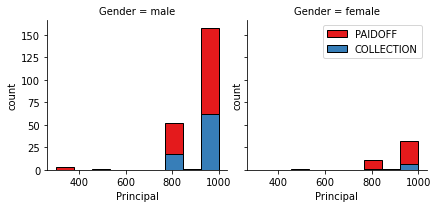

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
g.set(ylabel='count')
plt.show()

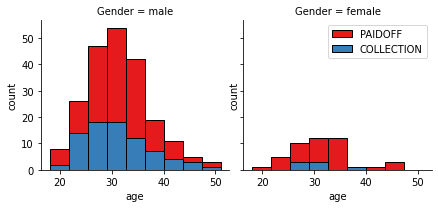

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10) #creates age array from min age to max age in steps of 10
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
g.set(ylabel='count')
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


In [12]:
df['dayofweek'] = df['effective_date'].apply(lambda x: x.strftime("%A")[:3])
df['dayofweek'].value_counts()

Sun    166
Mon     87
Wed     31
Sat     31
Tue     20
Fri      8
Thu      3
Name: dayofweek, dtype: int64

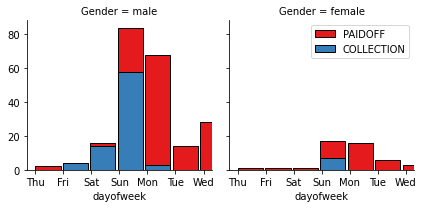

In [13]:
df['dayNum'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayNum.min(), df.dayNum.max())
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k",width=0.9)
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 3 (Friday)


In [14]:
df['endOfWeek'] = df['dayNum'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,dayNum,endOfWeek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,Thu,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,Thu,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,Thu,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,Fri,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,Fri,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [15]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [16]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,dayNum,endOfWeek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,Thu,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,Thu,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,Thu,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,Fri,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,Fri,4,1


## One Hot Encoding

#### How about education?


In [17]:
df['education'].replace(to_replace='Bechalor', value='Bachelor',inplace=True) #there was a misspelling 
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bachelor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [102]:
original_features = df[['Principal','terms','age','Gender','education']]
original_features.head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bachelor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame


In [19]:
Features = df[['Principal','terms','age','Gender','endOfWeek']]
Features = pd.concat([Features,pd.get_dummies(df['education'])], axis=1)
Features.drop(['Master or Above'], axis = 1,inplace=True) #we can drop this becuase it is implied by all 0's in the other columns 
Features.head()

,Principal,terms,age,Gender,endOfWeek,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define the feature set as X:


In [20]:
X = Features
X[0:5]

,Principal,terms,age,Gender,endOfWeek,Bachelor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [21]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Standardize Data


Data Standardization give data zero mean and unit variance 


In [22]:
from sklearn.preprocessing import StandardScaler
X_Standardized = StandardScaler().fit(X).transform(X)
X_Standardized[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


A training set will be used to build an accurate model. And a test set will be used to report the accuracy of the model
The following algorithms will be tested:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression


*   Note: Pre-processing, feature selection, feature-extraction, can potentially be changed to make a better model.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Standardized, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# K Nearest Neighbor(KNN)

Notice: A function was defined to find the best k to build the model with the highest accuracy.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#function to determine best k-value and return it
def choose_best_k(k_up_to):
    acc = []
    test_k = range(1,k_up_to+1)
    for k in test_k:
        KNN = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
        y_pred = KNN.predict(X_test)
        a = metrics.accuracy_score(y_test, y_pred)
        acc.append(round(a,3))
    highest_acc = max(acc)
    best_k = acc.index(max(acc))+1
    #plot the change in accuracy when changing k-value 
    plt.plot(test_k,acc,linestyle='--', marker='o', color='k')
    plt.title('Accuracy For Each K')
    plt.xticks(test_k)
    plt.xlabel('k')
    plt.ylabel('accuracy (%)')
    plt.show()
    print(f'\nbest_k:{best_k}  accuracy:{highest_acc}\n')
    return best_k

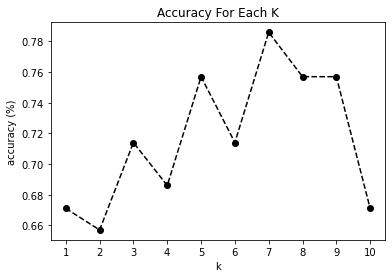


best_k:7  accuracy:0.786



In [25]:
k_up_to = 10
best_k = choose_best_k(k_up_to)

In [26]:
#train the knn model with k=7 on the full dataset
KNN = KNeighborsClassifier(n_neighbors=7).fit(X_Standardized,y)

# Decision Tree


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score

tree = DecisionTreeClassifier()

params = { 
          'criterion' : ['gini', 'entropy'],
          'max_depth': [2,4,6,8,10,12],
          'max_features': ['auto', 'sqrt', 'log2'],
          'ccp_alpha': [0.1, 0.01, 0.001]
         }

search = GridSearchCV(tree, params, cv=5, n_jobs=-1)
search.fit(X_train, y_train)
final_model = search.best_estimator_
print(f'Best Parameters: {final_model}')

Best Parameters: DecisionTreeClassifier(ccp_alpha=0.1, max_depth=2, max_features='auto')


In [28]:
tree = DecisionTreeClassifier(ccp_alpha=0.1, max_depth=2, max_features='auto').fit(X_train,y_train)
y_pred = tree.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy = {round(acc,3)}')

Accuracy = 0.786


# Support Vector Machine


In [29]:
from sklearn.svm import SVC

clf = SVC()

params = {
          'C': [1, 10, 100, 1000], 
          'gamma': [0.001, 0.0001], 
          'kernel': ['rbf','linear']
         }

search = GridSearchCV(clf, params, cv=5, n_jobs=-1)
search.fit(X_train, y_train)
final_model = search.best_estimator_
print(f'Best Parameters: {final_model}')

Best Parameters: SVC(C=1, gamma=0.001)


In [30]:
#fit svc using above parameters 
clf = SVC(C=1, gamma=0.001).fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy = {round(acc,3)}')

Accuracy = 0.786


# Logistic Regression


In [31]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression().fit(X_train, y_train)
y_pred = logr.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy = {round(acc,3)}')

Accuracy = 0.729


# Gradient Boost Classifier 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier()

params = {
          'n_estimators':[5,50,250,500],
          'max_depth':[1,3,5,7,9],
          'learning_rate':[0.01,0.1,1,10,100]
         }

search = GridSearchCV(gboost, params, cv=5, n_jobs=-1)
search.fit(X_train, y_train)
final_model = search.best_estimator_
print(f'Best Parameters: {final_model}')

Best Parameters: GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=5)


In [33]:
#fit gboost using above parameters 
gboost = GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=5).fit(X_train,y_train)
y_pred = gboost.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy = {round(acc,3)}')

Accuracy = 0.786


# Model Evaluation using Test set


In [34]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [35]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-09-29 17:36:32--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-09-29 17:36:32 (83.8 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test Set for Evaluation

In [36]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [37]:
#clean the df same as above 
test_df['education'].replace(to_replace='Bechalor', value='Bachelor',inplace=True)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['endOfWeek'] = df['dayNum'].apply(lambda x: 1 if (x>3)  else 0)

#define the loan status as the test variable 
y_test = test_df['loan_status'].values

#create the test features df
test_features = test_df[['Principal','terms','age','Gender','endOfWeek']]
test_features = pd.concat([test_features,pd.get_dummies(test_df['education'])], axis=1)
test_features.drop(['Master or Above'], axis = 1,inplace=True) #we can drop this becuase it is implied by all 0's in the other columns 
test_features.head()

,Principal,terms,age,Gender,endOfWeek,Bachelor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,0,0,0,0
2,1000,30,43,1,0,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [38]:
#standardize the test features 
X_test = StandardScaler().fit(test_features).transform(test_features)
X_test[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -4.12310563,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -4.12310563,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -4.12310563,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.24253563,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.24253563,
         2.39791576, -0.79772404, -0.86135677]])

## Function to Get Results 

In [97]:
def get_results(models):
# Function to get the results for input models 
# Models is a list of the ML model to get results for ex.models = [KNN,tree,clf]
    rows = []
    for model in models:
        dec = 3 #how many decimals to round to 
        y_pred = model.predict(X_test)
        modelName = str(model)
        modelName = modelName[:modelName.find('(')]
        jacc = round(jaccard_score(y_test,y_pred,average='weighted'),dec)
        f1 = round(f1_score(y_test,y_pred,average='weighted'),dec)
        acc = round(metrics.accuracy_score(y_test, y_pred),dec)
        if model == logr:
            y_pred_prob = np.array([[round(item[0],4),round(item[1],3)]for item in logr.predict_proba(X_test)])
            log = round(log_loss(y_test,y_pred_prob),dec)
        else:
            log = 'NA'
        rows.append([modelName,jacc,f1,acc,log])

    results = pd.DataFrame(data=rows,columns=['Algorithm','Jaccard','F1-Score','Accuracy','LogLoss'])
    return results 

In [98]:
models = [KNN,tree,clf,logr,gboost]
results_df = get_results(models)
print(results_df)

                    Algorithm  Jaccard  F1-Score  Accuracy LogLoss
0        KNeighborsClassifier    0.510     0.633     0.667      NA
1      DecisionTreeClassifier    0.549     0.630     0.741      NA
2                         SVC    0.549     0.630     0.741      NA
3          LogisticRegression    0.549     0.630     0.741   0.548
4  GradientBoostingClassifier    0.549     0.630     0.741      NA


## Plot Results 

In [99]:
#transform the results to plot 
results_df = pd.melt(results_df, id_vars="Algorithm", var_name="Eval_Metric", value_name="Value")
#drop the rows with log loss values
results_df = results_df.drop(results_df[results_df['Eval_Metric'] == 'LogLoss'].index)
results_df

,Algorithm,Eval_Metric,Value
0,KNeighborsClassifier,Jaccard,0.51
1,DecisionTreeClassifier,Jaccard,0.549
2,SVC,Jaccard,0.549
3,LogisticRegression,Jaccard,0.549
4,GradientBoostingClassifier,Jaccard,0.549
5,KNeighborsClassifier,F1-Score,0.633
6,DecisionTreeClassifier,F1-Score,0.63
7,SVC,F1-Score,0.63
8,LogisticRegression,F1-Score,0.63
9,GradientBoostingClassifier,F1-Score,0.63


<AxesSubplot:xlabel='Algorithm', ylabel='Value'>

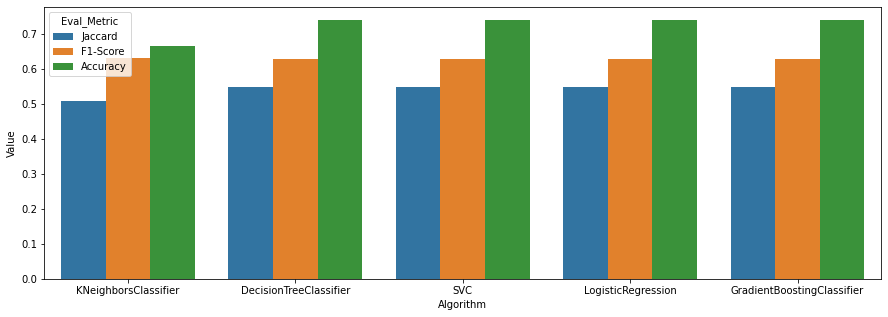

In [100]:
#plot the results 
import seaborn as sb
from matplotlib.pyplot import figure
figure(figsize=(15, 5))
sb.barplot(x='Algorithm',y='Value',hue='Eval_Metric',data=results_df)

The highest accuracy of 74% is achieved by the decision tree, support vector machine, logistic regression, and gradient boost algorithms. It is hard to say how the accuracy of these models can be improved, but some options would be to do some feature engineering on the existing variables or to try to collect more data about the customers. It may be useful to gether more information about customer location, income, marriage status, number of children etc...